<a href="https://colab.research.google.com/github/nxshi/IDS131F21/blob/main/ProblemSets/Classification%2BClustering/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [ ]:
import os
import pandas as pd
import numpy as np
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib.pyplot as plt
from scipy import stats
from google.colab import drive
drive.mount('/content/gdrive')
DATADIR = os.path.join('/content/gdrive/My Drive/ps2')
os.chdir(DATADIR)
!python -m pip install dask[dataframe] --upgrade
!pip install memory_profiler
import warnings
warnings.filterwarnings('ignore')
import dask
import dask.array as da
import dask.dataframe as dd
from dask.diagnostics import ProgressBar 
print("Pandas version: ", pd.__version__)
print("Dask   version: ", dask.__version__)
from memory_profiler import memory_usage
import memory_profiler
%load_ext memory_profiler

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Pandas version:  1.1.5
Dask   version:  2.12.0


#Problem 2.4

## part a

In [ ]:
df = pd.read_csv('trapnell.csv')
df = df.T
df = df.reset_index()

In [ ]:
sums= df.sum()
df = df.drop(labels = list(np.where(sums == 0)[0]), axis = 1)
df.shape

(272, 753946)

In [ ]:
df.sum()

KeyboardInterrupt: ignored

In [ ]:
plt.plot(df.sum(1))

KeyboardInterrupt: ignored

In [ ]:
df.sum(1).mean()

In [ ]:
scaled_data = preprocessing.scale(df.T)

In [ ]:
scaled_data = pd.DataFrame(scaled_data).T

In [ ]:
scaled_data = preprocessing.scale(scaled_data)

In [ ]:
sums_transformed = scaled_data.sum(1)

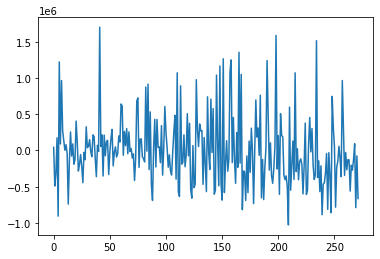

In [ ]:
plt.plot(sums_transformed)

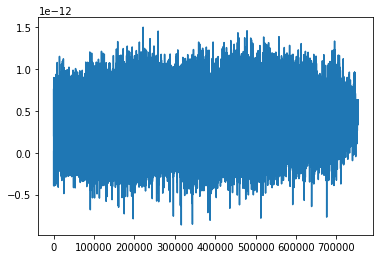

In [ ]:
plt.plot(scaled_data.sum(0))

In [ ]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

In [ ]:
type(pca_data)

numpy.ndarray

In [ ]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

In [ ]:
per_var = per_var[:271]

In [ ]:
len(per_var)

271

In [ ]:
per_var.sum()

100.30000000000004

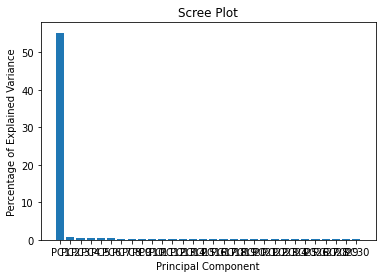

In [ ]:
plt.bar(x = range(len(per_var[:30])), height = per_var[:30], tick_label=labels[:30])
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
per_var[:10]

array([55.2,  0.7,  0.5,  0.5,  0.4,  0.4,  0.3,  0.3,  0.3,  0.3])

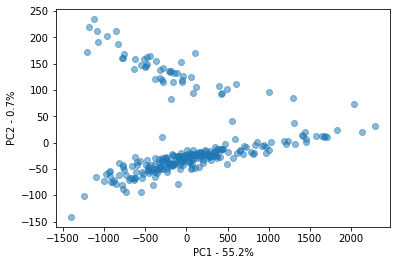

In [ ]:
pca_df = pd.DataFrame(pca_data, columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2, alpha=0.5)
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

#for cell in pca_df.index:
#  plt.annotate(cell,(pca_df.PC1.loc[cell],pca_df.PC2.loc[cell]))

plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5)
tsne_results = tsne.fit_transform(pca_data)

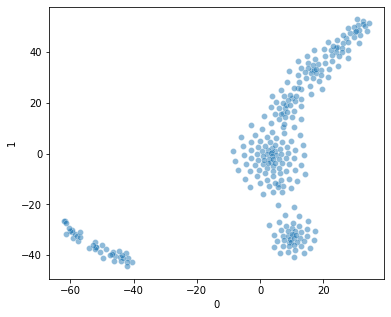

In [ ]:
#df['tsne-2d-one'] = tsne_results[:,0]
#df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(6,5))

tsne_results = pd.DataFrame(tsne_results)

import seaborn as sns
sns.scatterplot(x=tsne_results[0], y=tsne_results[1], alpha=0.5)

In [ ]:
list(tsne_results).index(1)


1

In [ ]:
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
 
#predict the labels of clusters.
label = kmeans.fit_predict(tsne_results)

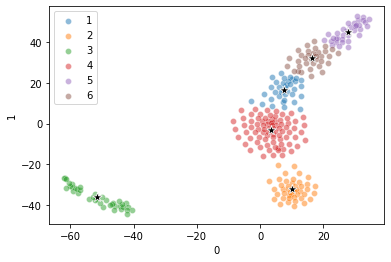

In [ ]:
#Getting unique labels
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    filtered_label = tsne_results[label == i]
    sns.scatterplot(filtered_label[0] , filtered_label[1], label = i+1, alpha = 0.5)
sns.scatterplot(centroids[:,0] , centroids[:,1], color = 'black', marker='*',s=100)
sns.ylabel = 'tsne2'
sns.ylabel = 'tsne1'

In [ ]:
'''df_groups = []
df_T = df.T
for u in u_labels:
  dfi = pd.DataFrame(df_T, columns = [str(x) for x in list(np.where(label == u)[0])])
  df_groups.append(dfi)'''

'df_groups = []\ndf_T = df.T\nfor u in u_labels:\n  dfi = pd.DataFrame(df_T, columns = [str(x) for x in list(np.where(label == u)[0])])\n  df_groups.append(dfi)'

In [ ]:
'''for group in df_groups:
  print(group.shape)'''

'for group in df_groups:\n  print(group.shape)'

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

t0 = time.time()
train_samples = 200

# Load training data
X = df
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=72)

lr = LogisticRegression(penalty='elasticnet', class_weight='balanced', C=50, solver='saga', max_iter=10, multi_class='multinomial', l1_ratio=0.8)

In [ ]:
# Fit the model
lr.fit(X_train, y_train)

LogisticRegression(C=50, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=0.8,
                   max_iter=10, multi_class='multinomial', n_jobs=None,
                   penalty='elasticnet', random_state=None, solver='saga',
                   tol=0.0001, verbose=0, warm_start=False)

In [ ]:
#sparsity = np.mean(lr.coef_ == 0) * 100
#score = lr.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
#print("Sparsity with elastic net penalty: %.2f%%" % sparsity)
#print("Test score with elastic net penalty: %.4f" % score)

coef = lr.coef_.copy()
#scale = np.abs(coef).max()

In [ ]:
for coef_class in coef:
  print(np.where(coef_class == coef_class.max()))
  print(coef_class.max())

(array([57536]),)
0.49202311883513117
(array([40]),)
1.4996460184509683
(array([6976]),)
11.639353515024315
(array([40]),)
0.6910120314428013
(array([100799]),)
0.26746947864822646
(array([112496]),)
0.021234729549935077


In [ ]:
coef[4].max()

0.26746947864822646

In [ ]:
'''from scipy.spatial.distance import pdist, squareform

def minimum_spanning_tree(X, copy_X=True):
    """X are edge weights of fully connected graph"""
    if copy_X:
        X = X.copy()

    if X.shape[0] != X.shape[1]:
        raise ValueError("X needs to be square matrix of edge weights")
    n_vertices = X.shape[0]
    spanning_edges = []
    
    # initialize with node 0:                                                                                         
    visited_vertices = [0]                                                                                            
    num_visited = 1
    # exclude self connections:
    diag_indices = np.arange(n_vertices)
    X[diag_indices, diag_indices] = np.inf
    
    while num_visited != n_vertices:
        new_edge = np.argmin(X[visited_vertices], axis=None)
        # 2d encoding of new_edge from flat, get correct indices                                                      
        new_edge = divmod(new_edge, n_vertices)
        new_edge = [visited_vertices[new_edge[0]], new_edge[1]]                                                       
        # add edge to tree
        spanning_edges.append(new_edge)
        visited_vertices.append(new_edge[1])
        # remove all edges inside current tree
        X[visited_vertices, new_edge[1]] = np.inf
        X[new_edge[1], visited_vertices] = np.inf                                                                     
        num_visited += 1
    return np.vstack(spanning_edges)


def test_mst():
    P = np.random.uniform(size=(50, 2))

    X = squareform(pdist(P))
    edge_list = minimum_spanning_tree(X)
    plt.scatter(P[:, 0], P[:, 1])
    
    for edge in edge_list:
        i, j = edge
        plt.plot([P[i, 0], P[j, 0]], [P[i, 1], P[j, 1]], c='r')
    plt.show()

if __name__ == "__main__":
    test_mst()
'''

In [ ]:
u_labels

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
import networkx as nx
    
Dcentroid = pairwise_distances(centroids) #Metric = jensen_shannon

(-11973.787565064089,
 10771.764375198274,
 -7717.309863493449,
 8559.130736300624)

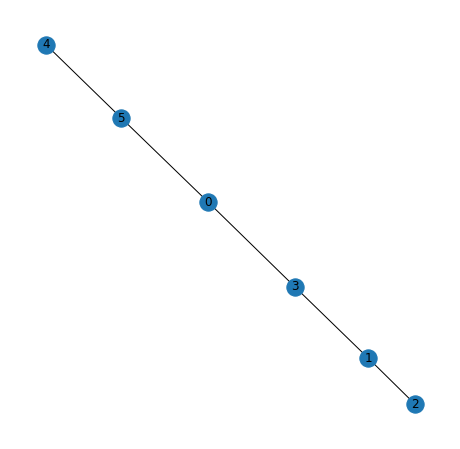

In [ ]:
fig=plt.figure(figsize=(8,8))

G = nx.complete_graph(len(np.unique(u_labels)))
for u,v in G.edges():
    G[u][v]["weight"]=Dcentroid[u,v]
    
T=nx.minimum_spanning_tree(G)
pos=nx.spring_layout(T,scale=10000)
nx.draw_networkx(T,pos)
edge_labels=dict([((u,v,),round(d['weight'],2))
             for u,v,d in T.edges(data=True)])
plt.axis('off')

In [ ]:
centroids

array([[  7.449842 ,  16.486097 ],
       [ 10.159973 , -32.241596 ],
       [-51.48272  , -36.303013 ],
       [  3.337034 ,  -3.3594275],
       [ 27.732605 ,  45.190254 ],
       [ 16.314226 ,  32.06813  ]], dtype=float32)

In [ ]:
label = np.array([3, 4, 5, 1, 4, 2, 3, 2, 1, 3, 3, 3, 3, 4, 3, 1, 3, 3, 0, 0, 1, 3,
       5, 0, 3, 5, 5, 3, 0, 1, 3, 3, 1, 3, 3, 1, 1, 3, 5, 3, 3, 2, 3, 1,
       5, 1, 3, 3, 1, 5, 3, 1, 1, 0, 3, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 1,
       3, 1, 3, 3, 3, 3, 5, 3, 2, 2, 0, 1, 1, 3, 3, 3, 2, 3, 2, 5, 2, 5,
       4, 3, 1, 0, 1, 3, 3, 0, 1, 5, 3, 2, 1, 3, 0, 3, 0, 5, 3, 1, 2, 5,
       2, 4, 4, 2, 0, 0, 1, 0, 3, 2, 3, 1, 4, 4, 3, 5, 5, 2, 1, 3, 1, 1,
       1, 5, 1, 0, 4, 2, 3, 0, 2, 3, 2, 4, 4, 2, 3, 5, 2, 5, 4, 2, 4, 0,
       1, 0, 3, 2, 2, 3, 2, 3, 4, 1, 0, 2, 0, 2, 4, 0, 0, 4, 3, 4, 1, 0,
       1, 3, 4, 3, 2, 1, 1, 3, 2, 4, 3, 4, 0, 3, 2, 2, 0, 3, 5, 5, 0, 3,
       2, 0, 1, 4, 2, 1, 1, 5, 5, 5, 5, 4, 2, 4, 0, 1, 5, 2, 0, 3, 5, 3,
       3, 0, 4, 0, 1, 4, 4, 3, 2, 3, 1, 0, 5, 5, 2, 5, 3, 4, 0, 4, 5, 5,
       5, 3, 4, 3, 5, 4, 2, 1, 3, 4, 0, 3, 3, 3, 5, 2, 1, 5, 3, 0, 3, 3,
       4, 0, 5, 0, 3, 4, 3, 4])
u_labels = np.arange(6)

In [ ]:
X_separated=[]
long = df.shape[1]
for labl in np.unique(u_labels):
    features=df.loc[np.flatnonzero(label==labl),:]
    X_separated.append(features)


In [ ]:
for group in X_separated: 
  print(group.shape)

(36, 1065024)
(45, 1065024)
(39, 1065024)
(82, 1065024)
(34, 1065024)
(36, 1065024)


In [ ]:
Xcentroid=np.zeros((len(np.unique(label)), (X_separated[0].shape)[1]-1))
for labl in np.unique(label):
    Xq=X_separated[labl].mean()
    Xcentroid[labl, :]=Xq

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
import networkx as nx
    
Dcentroid = pairwise_distances(Xcentroid) #Metric = jensen_shannon

In [ ]:
fig=plt.figure(figsize=(8,8))

G = nx.complete_graph(len(np.unique(u_labels)))
for u,v in G.edges():
    G[u][v]["weight"]=Dcentroid[u,v]
    
T=nx.minimum_spanning_tree(G)
pos=nx.spring_layout(T,scale=10000)
nx.draw_networkx(T,pos)
edge_labels=dict([((u,v,),round(d['weight'],2))
             for u,v,d in T.edges(data=True)])
plt.axis('off')

NameError: ignored